In [1]:
#note that from a programming perspective, this script is somehow uninteresting, as it mostly documents a process of visually exploring the DataFrames created within the other two scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load all DataFrames from our csv-files
df_word_count = pd.read_csv('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\word_count.csv')
df_unedited = pd.read_csv('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\sentiment_analysis_unedited.csv')
df_no_stop_lemma = pd.read_csv('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\sentiment_analysis_no_stop_lemma.csv')

In [3]:
#we will start visualizing the word_count-DataFrame
#let's first have look at it again
df_word_count

,name,count_words_total,count_words_distinct,distinct_words_per_1000_words
0,The Voyage Out,146530,10929,74.585409
1,Night and Day,177794,11734,65.997728
2,Monday or Tuesday,19637,3796,193.308550
3,Jacob's Room,57977,7450,128.499232
4,Mrs Dalloway,65816,7150,108.636198
5,To the Lighthouse,71214,6813,95.669391
6,Orlando,80442,9452,117.500808
7,The Waves,78626,8924,113.499351
8,Flush,35311,5293,149.896633
9,The Years,138161,8568,62.014606


In [4]:
#for a better comparison, let's calculate the mean-values of the word_count-DataFrame - excluding Jacob's Room which will be the book we compare the mean-value with
#first create a DF without Jacob's Room
df_word_count_without_jacob = df_word_count.drop(3)
df_word_count_without_jacob

,name,count_words_total,count_words_distinct,distinct_words_per_1000_words
0,The Voyage Out,146530,10929,74.585409
1,Night and Day,177794,11734,65.997728
2,Monday or Tuesday,19637,3796,193.308550
4,Mrs Dalloway,65816,7150,108.636198
5,To the Lighthouse,71214,6813,95.669391
6,Orlando,80442,9452,117.500808
7,The Waves,78626,8924,113.499351
8,Flush,35311,5293,149.896633
9,The Years,138161,8568,62.014606
10,Between the Acts,48288,6535,135.333830


In [5]:
#get all the mean-values of this new DF
df_word_count_without_jacob.mean()

count_words_total                86181.90000
count_words_distinct              7919.40000
distinct_words_per_1000_words      111.64425
dtype: float64

In [6]:
#add the mean-values to the original word_count-DF, change the name of this row to "mean"
df_word_count = df_word_count.append(df_word_count_without_jacob.mean(), ignore_index=True)
df_word_count.at[11,'name']='mean'

In [7]:
df_word_count

,name,count_words_total,count_words_distinct,distinct_words_per_1000_words
0,The Voyage Out,146530.0,10929.0,74.585409
1,Night and Day,177794.0,11734.0,65.997728
2,Monday or Tuesday,19637.0,3796.0,193.308550
3,Jacob's Room,57977.0,7450.0,128.499232
4,Mrs Dalloway,65816.0,7150.0,108.636198
5,To the Lighthouse,71214.0,6813.0,95.669391
6,Orlando,80442.0,9452.0,117.500808
7,The Waves,78626.0,8924.0,113.499351
8,Flush,35311.0,5293.0,149.896633
9,The Years,138161.0,8568.0,62.014606


In [8]:
#sort the word_count-DF
df_word_count = df_word_count.sort_values('distinct_words_per_1000_words', ascending = False)

In [9]:
df_word_count

,name,count_words_total,count_words_distinct,distinct_words_per_1000_words
2,Monday or Tuesday,19637.0,3796.0,193.308550
8,Flush,35311.0,5293.0,149.896633
10,Between the Acts,48288.0,6535.0,135.333830
3,Jacob's Room,57977.0,7450.0,128.499232
6,Orlando,80442.0,9452.0,117.500808
7,The Waves,78626.0,8924.0,113.499351
11,mean,86181.9,7919.4,111.644250
4,Mrs Dalloway,65816.0,7150.0,108.636198
5,To the Lighthouse,71214.0,6813.0,95.669391
0,The Voyage Out,146530.0,10929.0,74.585409


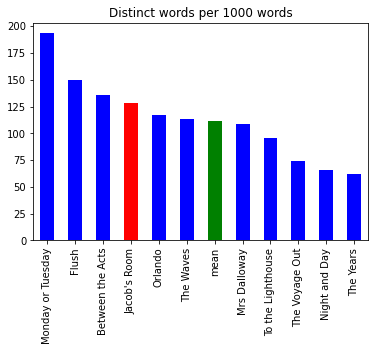

In [10]:
#now create a barplot out of it
colors = ['b','b','b','r','b','b','g','b','b','b','b','b']
vis_word_count = df_word_count.plot(x='name', y='distinct_words_per_1000_words', kind='bar', title='Distinct words per 1000 words', color=colors)
vis_word_count.set_xlabel(None)
vis_word_count.set_ylabel(None)
vis_word_count.get_legend().remove()

In [11]:
#save the plot as a png-file
fig = vis_word_count.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\distinct_words_per_1000_words.png', bbox_inches='tight', dpi=300, quality=True)

In [12]:
#now we will take a look at the unedited-DF
df_unedited

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
0,The Voyage Out,23.964455,40.318188,35.717357,0.056750,0.862865,0.080377,0.077669
1,Night and Day,26.112366,33.550272,40.337362,0.062205,0.850129,0.087663,0.094508
2,Monday or Tuesday,21.792619,47.275923,30.931459,0.069490,0.838007,0.092510,0.053961
3,Jacob's Room,21.629543,50.293083,28.077374,0.058438,0.870877,0.070682,0.043306
4,Mrs Dalloway,22.769064,45.078421,32.152515,0.071012,0.836510,0.092484,0.072555
5,To the Lighthouse,24.189881,42.950540,32.859579,0.062536,0.855915,0.081550,0.062279
6,Orlando,25.871667,38.265456,35.862877,0.063321,0.853260,0.083415,0.071983
7,The Waves,24.701349,48.728324,26.570328,0.068340,0.865676,0.065984,0.016515
8,Flush,29.468822,47.066975,23.464203,0.076055,0.865644,0.058298,-0.008477
9,The Years,15.456293,64.317409,20.226298,0.046482,0.892418,0.061101,0.034301


In [13]:
#again calculate the mean-values and adding them to the DF
df_unedited_without_jacob = df_unedited.drop(3)
df_unedited = df_unedited.append(df_unedited_without_jacob.mean(), ignore_index=True)
df_unedited.at[11,'name']='mean'
df_unedited

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
0,The Voyage Out,23.964455,40.318188,35.717357,0.056750,0.862865,0.080377,0.077669
1,Night and Day,26.112366,33.550272,40.337362,0.062205,0.850129,0.087663,0.094508
2,Monday or Tuesday,21.792619,47.275923,30.931459,0.069490,0.838007,0.092510,0.053961
3,Jacob's Room,21.629543,50.293083,28.077374,0.058438,0.870877,0.070682,0.043306
4,Mrs Dalloway,22.769064,45.078421,32.152515,0.071012,0.836510,0.092484,0.072555
5,To the Lighthouse,24.189881,42.950540,32.859579,0.062536,0.855915,0.081550,0.062279
6,Orlando,25.871667,38.265456,35.862877,0.063321,0.853260,0.083415,0.071983
7,The Waves,24.701349,48.728324,26.570328,0.068340,0.865676,0.065984,0.016515
8,Flush,29.468822,47.066975,23.464203,0.076055,0.865644,0.058298,-0.008477
9,The Years,15.456293,64.317409,20.226298,0.046482,0.892418,0.061101,0.034301


In [14]:
#with both the unedited-DF and the DF where words were lemmatized and stopwords were removed we now create three plots each:
#one depicting the percentage of positive sentences in all books, one depicting the average positive-value provided by VADER and one depicting VADER's average compound-value
#the operations for doing so are very much like above, meaning from now on, this code will repeat itself a lot
df_unedited = df_unedited.sort_values('pos_sentences_perc', ascending = False)
df_unedited

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
1,Night and Day,26.112366,33.550272,40.337362,0.062205,0.850129,0.087663,0.094508
6,Orlando,25.871667,38.265456,35.862877,0.063321,0.853260,0.083415,0.071983
0,The Voyage Out,23.964455,40.318188,35.717357,0.056750,0.862865,0.080377,0.077669
5,To the Lighthouse,24.189881,42.950540,32.859579,0.062536,0.855915,0.081550,0.062279
4,Mrs Dalloway,22.769064,45.078421,32.152515,0.071012,0.836510,0.092484,0.072555
2,Monday or Tuesday,21.792619,47.275923,30.931459,0.069490,0.838007,0.092510,0.053961
11,mean,22.848899,47.541635,29.609466,0.062068,0.862347,0.075584,0.050645
3,Jacob's Room,21.629543,50.293083,28.077374,0.058438,0.870877,0.070682,0.043306
7,The Waves,24.701349,48.728324,26.570328,0.068340,0.865676,0.065984,0.016515
8,Flush,29.468822,47.066975,23.464203,0.076055,0.865644,0.058298,-0.008477


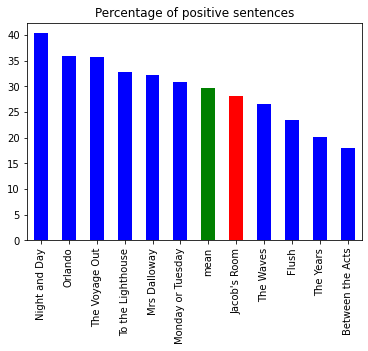

In [15]:
colors = ['b','b','b','b','b','b','g','r','b','b','b','b']
vis_unedited_pos_sentences = df_unedited.plot(x='name', y='pos_sentences_perc', kind='bar', title='Percentage of positive sentences', color=colors)
vis_unedited_pos_sentences.set_xlabel(None)
vis_unedited_pos_sentences.set_ylabel(None)
vis_unedited_pos_sentences.get_legend().remove()

In [16]:
fig = vis_unedited_pos_sentences.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\unedited_pos_sentences_perc.png', bbox_inches='tight', dpi=300, quality=True)

In [17]:
df_unedited = df_unedited.sort_values('avg_pos', ascending = False)
df_unedited

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
2,Monday or Tuesday,21.792619,47.275923,30.931459,0.069490,0.838007,0.092510,0.053961
4,Mrs Dalloway,22.769064,45.078421,32.152515,0.071012,0.836510,0.092484,0.072555
1,Night and Day,26.112366,33.550272,40.337362,0.062205,0.850129,0.087663,0.094508
6,Orlando,25.871667,38.265456,35.862877,0.063321,0.853260,0.083415,0.071983
5,To the Lighthouse,24.189881,42.950540,32.859579,0.062536,0.855915,0.081550,0.062279
0,The Voyage Out,23.964455,40.318188,35.717357,0.056750,0.862865,0.080377,0.077669
11,mean,22.848899,47.541635,29.609466,0.062068,0.862347,0.075584,0.050645
3,Jacob's Room,21.629543,50.293083,28.077374,0.058438,0.870877,0.070682,0.043306
7,The Waves,24.701349,48.728324,26.570328,0.068340,0.865676,0.065984,0.016515
9,The Years,15.456293,64.317409,20.226298,0.046482,0.892418,0.061101,0.034301


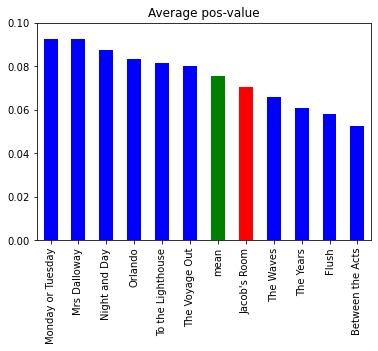

In [18]:
colors = ['b','b','b','b','b','b','g','r','b','b','b','b']
vis_unedited_avg_pos = df_unedited.plot(x='name', y='avg_pos', kind='bar', title='Average pos-value', color=colors, yticks=np.arange(0,0.12,0.02) )
vis_unedited_avg_pos.set_xlabel(None)
vis_unedited_avg_pos.set_ylabel(None)
vis_unedited_avg_pos.get_legend().remove()

In [19]:
fig = vis_unedited_avg_pos.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\unedited_avg_pos.png', bbox_inches='tight', dpi=300, quality=True)

In [20]:
df_unedited = df_unedited.sort_values('avg_comp', ascending = False)
df_unedited

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
1,Night and Day,26.112366,33.550272,40.337362,0.062205,0.850129,0.087663,0.094508
0,The Voyage Out,23.964455,40.318188,35.717357,0.056750,0.862865,0.080377,0.077669
4,Mrs Dalloway,22.769064,45.078421,32.152515,0.071012,0.836510,0.092484,0.072555
6,Orlando,25.871667,38.265456,35.862877,0.063321,0.853260,0.083415,0.071983
5,To the Lighthouse,24.189881,42.950540,32.859579,0.062536,0.855915,0.081550,0.062279
2,Monday or Tuesday,21.792619,47.275923,30.931459,0.069490,0.838007,0.092510,0.053961
11,mean,22.848899,47.541635,29.609466,0.062068,0.862347,0.075584,0.050645
3,Jacob's Room,21.629543,50.293083,28.077374,0.058438,0.870877,0.070682,0.043306
9,The Years,15.456293,64.317409,20.226298,0.046482,0.892418,0.061101,0.034301
10,Between the Acts,14.162473,67.864845,17.972682,0.044493,0.903048,0.052457,0.031151


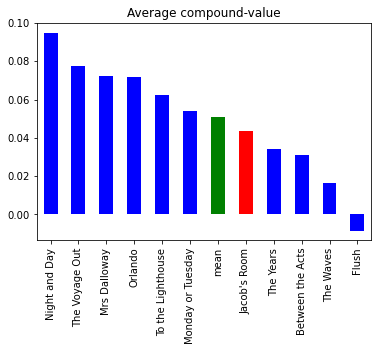

In [21]:
colors = ['b','b','b','b','b','b','g','r','b','b','b','b']
vis_unedited_avg_comp = df_unedited.plot(x='name', y='avg_comp', kind='bar', title='Average compound-value', color=colors, yticks=np.arange(0,0.12,0.02))
vis_unedited_avg_comp.set_xlabel(None)
vis_unedited_avg_comp.set_ylabel(None)
vis_unedited_avg_comp.get_legend().remove()

In [22]:
fig = vis_unedited_avg_comp.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\unedited_avg_comp.png', bbox_inches='tight', dpi=300, quality=True)

In [23]:
#all these steps are now repeated with the DF that was created after lemmatization and removing stopwords
df_no_stop_lemma_without_jacob = df_no_stop_lemma.drop(3)
df_no_stop_lemma = df_no_stop_lemma.append(df_no_stop_lemma_without_jacob.mean(), ignore_index=True)
df_no_stop_lemma.at[11,'name']='mean'
df_no_stop_lemma

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
0,The Voyage Out,22.502508,36.491329,41.006163,0.073472,0.803337,0.123190,0.112337
1,Night and Day,23.748174,31.451720,44.800106,0.078337,0.787602,0.134059,0.132330
2,Monday or Tuesday,20.562390,45.694200,33.743409,0.073873,0.814946,0.111181,0.077130
3,Jacob's Room,20.867526,49.560375,29.572098,0.067657,0.843924,0.088424,0.055916
4,Mrs Dalloway,20.876149,44.835046,34.288805,0.082544,0.797050,0.120402,0.091306
5,To the Lighthouse,21.461057,42.382035,36.156907,0.078344,0.803622,0.118030,0.088968
6,Orlando,23.469089,37.943159,38.587753,0.079297,0.801791,0.118919,0.100176
7,The Waves,22.273603,49.691715,28.034682,0.079472,0.826746,0.093781,0.036466
8,Flush,27.852194,47.713626,24.434180,0.093440,0.824173,0.082384,0.007876
9,The Years,14.701967,63.296850,22.001183,0.053322,0.869668,0.077009,0.044137


In [24]:
df_no_stop_lemma = df_no_stop_lemma.sort_values('pos_sentences_perc', ascending = False)
df_no_stop_lemma

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
1,Night and Day,23.748174,31.451720,44.800106,0.078337,0.787602,0.134059,0.132330
0,The Voyage Out,22.502508,36.491329,41.006163,0.073472,0.803337,0.123190,0.112337
6,Orlando,23.469089,37.943159,38.587753,0.079297,0.801791,0.118919,0.100176
5,To the Lighthouse,21.461057,42.382035,36.156907,0.078344,0.803622,0.118030,0.088968
4,Mrs Dalloway,20.876149,44.835046,34.288805,0.082544,0.797050,0.120402,0.091306
2,Monday or Tuesday,20.562390,45.694200,33.743409,0.073873,0.814946,0.111181,0.077130
11,mean,21.087272,46.693318,32.219409,0.073998,0.821513,0.104489,0.072995
3,Jacob's Room,20.867526,49.560375,29.572098,0.067657,0.843924,0.088424,0.055916
7,The Waves,22.273603,49.691715,28.034682,0.079472,0.826746,0.093781,0.036466
8,Flush,27.852194,47.713626,24.434180,0.093440,0.824173,0.082384,0.007876


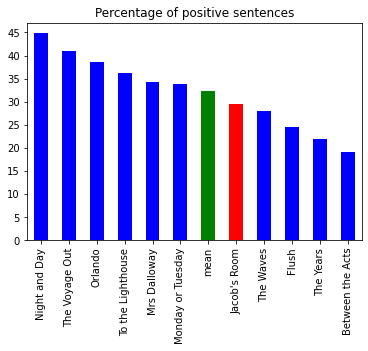

In [25]:
colors = ['b','b','b','b','b','b','g','r','b','b','b','b']
vis_no_stop_lemma_pos_sentences = df_no_stop_lemma.plot(x='name', y='pos_sentences_perc', kind='bar', title='Percentage of positive sentences', color=colors, yticks=np.arange(0,50,5))
vis_no_stop_lemma_pos_sentences.set_xlabel(None)
vis_no_stop_lemma_pos_sentences.set_ylabel(None)
vis_no_stop_lemma_pos_sentences.get_legend().remove()

In [26]:
fig = vis_no_stop_lemma_pos_sentences.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\no_stop_lemma_pos_sentences_perc.png', bbox_inches='tight', dpi=300, quality=True)

In [27]:
df_no_stop_lemma = df_no_stop_lemma.sort_values('avg_pos', ascending = False)
df_no_stop_lemma

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
1,Night and Day,23.748174,31.451720,44.800106,0.078337,0.787602,0.134059,0.132330
0,The Voyage Out,22.502508,36.491329,41.006163,0.073472,0.803337,0.123190,0.112337
4,Mrs Dalloway,20.876149,44.835046,34.288805,0.082544,0.797050,0.120402,0.091306
6,Orlando,23.469089,37.943159,38.587753,0.079297,0.801791,0.118919,0.100176
5,To the Lighthouse,21.461057,42.382035,36.156907,0.078344,0.803622,0.118030,0.088968
2,Monday or Tuesday,20.562390,45.694200,33.743409,0.073873,0.814946,0.111181,0.077130
11,mean,21.087272,46.693318,32.219409,0.073998,0.821513,0.104489,0.072995
7,The Waves,22.273603,49.691715,28.034682,0.079472,0.826746,0.093781,0.036466
3,Jacob's Room,20.867526,49.560375,29.572098,0.067657,0.843924,0.088424,0.055916
8,Flush,27.852194,47.713626,24.434180,0.093440,0.824173,0.082384,0.007876


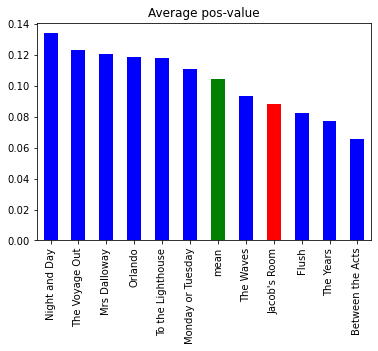

In [28]:
colors = ['b','b','b','b','b','b','g','b','r','b','b','b']
vis_no_stop_lemma_avg_pos = df_no_stop_lemma.plot(x='name', y='avg_pos', kind='bar', title='Average pos-value', color=colors)
vis_no_stop_lemma_avg_pos.set_xlabel(None)
vis_no_stop_lemma_avg_pos.set_ylabel(None)
vis_no_stop_lemma_avg_pos.get_legend().remove()

In [29]:
fig = vis_no_stop_lemma_avg_pos.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\no_stop_lemma_avg_pos.png', bbox_inches='tight', dpi=300, quality=True)

In [30]:
df_no_stop_lemma = df_no_stop_lemma.sort_values('avg_comp', ascending = False)
df_no_stop_lemma

,name,neg_sentences_perc,neu_sentences_perc,pos_sentences_perc,avg_neg,avg_neu,avg_pos,avg_comp
1,Night and Day,23.748174,31.451720,44.800106,0.078337,0.787602,0.134059,0.132330
0,The Voyage Out,22.502508,36.491329,41.006163,0.073472,0.803337,0.123190,0.112337
6,Orlando,23.469089,37.943159,38.587753,0.079297,0.801791,0.118919,0.100176
4,Mrs Dalloway,20.876149,44.835046,34.288805,0.082544,0.797050,0.120402,0.091306
5,To the Lighthouse,21.461057,42.382035,36.156907,0.078344,0.803622,0.118030,0.088968
2,Monday or Tuesday,20.562390,45.694200,33.743409,0.073873,0.814946,0.111181,0.077130
11,mean,21.087272,46.693318,32.219409,0.073998,0.821513,0.104489,0.072995
3,Jacob's Room,20.867526,49.560375,29.572098,0.067657,0.843924,0.088424,0.055916
9,The Years,14.701967,63.296850,22.001183,0.053322,0.869668,0.077009,0.044137
10,Between the Acts,13.425593,67.433501,19.140906,0.047874,0.886191,0.065934,0.039222


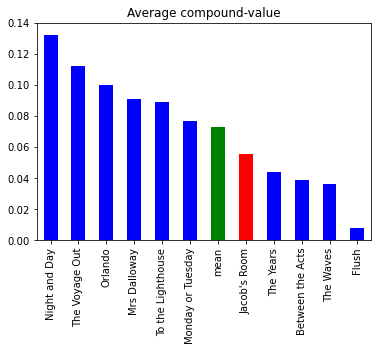

In [31]:
colors = ['b','b','b','b','b','b','g','r','b','b','b','b']
vis_no_stop_lemma_avg_comp = df_no_stop_lemma.plot(x='name', y='avg_comp', kind='bar', title='Average compound-value', color=colors, yticks=np.arange(0,0.16,0.02))
vis_no_stop_lemma_avg_comp.set_xlabel(None)
vis_no_stop_lemma_avg_comp.set_ylabel(None)
vis_no_stop_lemma_avg_comp.get_legend().remove()

In [32]:
fig = vis_no_stop_lemma_avg_comp.get_figure()
fig.savefig('C:\\Users\\Jakob\\Desktop\\Werkzeuge Hausarbeit\\Ergebnisse\\images\\no_stop_lemma_avg_comp.png', bbox_inches='tight', dpi=300, quality=True)

In [33]:
#done!